# Email Spam Classifier

SMS Spam Collection Dataset from Kaggle

Link: https://www.kaggle.com/datasets/uciml/sms-spam-collection-dataset

The SMS Spam Collection is a set of SMS tagged messages that have been collected for SMS Spam research. It contains one set of SMS messages in English of 5,574 messages, tagged acording being ham (legitimate) or spam.

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("/Users/rajatchauhan/Desktop/Machine Learning Notes/Projects/2. Email Spam Classifier/spam.csv",
                encoding='latin-1')
df

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


Steps to be followed :
    
1. Data Cleaning
2. EDA
3. Text Preprocessing
4. Model Building
5. Evaluation
6. Improvements
7. Creating Website
8. Deployment

## 1. Data Cleaning

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


Seems like, last three columns do not have much content, we can simply drop these columns

- Dropping unnecessary columns

In [4]:
df.drop(columns = ["Unnamed: 2","Unnamed: 3","Unnamed: 4"], inplace=True)

In [5]:
df.sample(5)

,v1,v2
240,ham,Tomarrow final hearing on my laptop case so i ...
1927,ham,Omg it could snow here tonite!
3447,ham,Its &lt;#&gt; k here oh. Should i send home f...
2385,spam,Someone has contacted our dating service and e...
1596,spam,As a Registered Subscriber yr draw 4 a å£100 g...


- Renaming columns

In [6]:
df.rename(columns= {"v1": "label", "v2" : "text"}, inplace = True)
df.sample(5)

,label,text
3623,ham,No message..no responce..what happend?
361,ham,Oh ok no prob..
43,ham,WHO ARE YOU SEEING?
1643,ham,U WILL SWITCH YOUR FONE ON DAMMIT!!
4286,ham,I wud never mind if u dont miss me or if u don...


In [7]:
df["label"].value_counts()

ham     4825
spam     747
Name: label, dtype: int64

- Label Encoding is always preferred for Target columns

In [8]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [9]:
df["label"] = encoder.fit_transform(df["label"])
df.head()

,label,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


- Checking for any missing values

In [10]:
df.isnull().sum()

label    0
text     0
dtype: int64

- Checking for any duplicate records

In [11]:
df.duplicated().sum()

403

Wow, there are so many duplicate records:

In [12]:
df.drop_duplicates(keep = 'first', inplace= True)

In [13]:
df.duplicated().sum()

0

In [14]:
df.shape

(5169, 2)

## 2. EDA

In [15]:
df

,label,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...
5568,0,Will Ì_ b going to esplanade fr home?
5569,0,"Pity, * was in mood for that. So...any other s..."
5570,0,The guy did some bitching but I acted like i'd...


- How much sms are spams??

In [16]:
df["label"].value_counts()

0    4516
1     653
Name: label, dtype: int64

So, 653 are spam messages here

In [17]:
import matplotlib.pyplot as plt

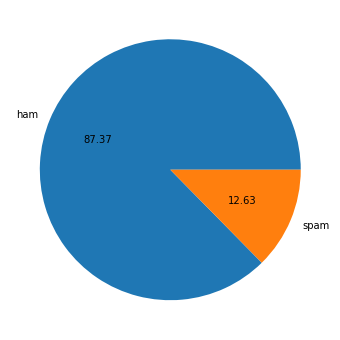

In [18]:
plt.figure(figsize = (12,6))
plt.pie(df["label"].value_counts(), labels = ["ham", "spam"], autopct="%0.2f")
plt.show()

Clearly, we have an imbalanced data here, with very few messages as spam

- Analysing Text columns now, to see

1. Number of characters
2. Number of words
3. Number of sentences

and their affect on target variable.

1. Number of Characters

In [19]:
df["text"].apply(len)

0       111
1        29
2       155
3        49
4        61
       ... 
5567    161
5568     37
5569     57
5570    125
5571     26
Name: text, Length: 5169, dtype: int64

In [20]:
df["num_characters"] = df["text"].apply(len)
df.sample(5)

,label,text,num_characters
3458,1,Not heard from U4 a while. Call me now am here...,153
4753,0,Ok lor... Or u wan me go look 4 u?,34
444,0,\HEY HEY WERETHE MONKEESPEOPLE SAY WE MONKEYAR...,66
1177,0,Just nw i came to hme da..,26
110,0,What is the plural of the noun research?,40


2. Number of words

For this, we will use nltk (Natural Language Toolkit library), very famous NLP library

NLTK (Natural Language Toolkit) is a popular library in Python for working with human language data and text analysis. It provides easy-to-use interfaces to over 50 corpora and lexical resources, such as WordNet, along with a suite of text processing libraries for classification, tokenization, stemming, tagging, parsing, and more.

In [21]:
import nltk

We need to download the tokenizer models (some dependencies)

In [22]:
nltk.download('punkt')  

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/rajatchauhan/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

word_tokenize is a function provided by the Natural Language Toolkit (NLTK) for tokenizing text, which means splitting a piece of text into individual words or tokens. This function is used to break down a sentence or paragraph into its constituent words, making it easier to analyze and process text data.

In [23]:
df["text"].apply(lambda x: nltk.word_tokenize(x))

0       [Go, until, jurong, point, ,, crazy, .., Avail...
1                [Ok, lar, ..., Joking, wif, u, oni, ...]
2       [Free, entry, in, 2, a, wkly, comp, to, win, F...
3       [U, dun, say, so, early, hor, ..., U, c, alrea...
4       [Nah, I, do, n't, think, he, goes, to, usf, ,,...
                              ...                        
5567    [This, is, the, 2nd, time, we, have, tried, 2,...
5568     [Will, Ì_, b, going, to, esplanade, fr, home, ?]
5569    [Pity, ,, *, was, in, mood, for, that, ., So, ...
5570    [The, guy, did, some, bitching, but, I, acted,...
5571                  [Rofl, ., Its, true, to, its, name]
Name: text, Length: 5169, dtype: object

In [24]:
df["text"].apply(lambda x: len(nltk.word_tokenize(x)))

0       24
1        8
2       37
3       13
4       15
        ..
5567    35
5568     9
5569    15
5570    27
5571     7
Name: text, Length: 5169, dtype: int64

In [25]:
df["num_words"] = df["text"].apply(lambda x: len(nltk.word_tokenize(x)))
df.head()

,label,text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


3. Number of sentences

In [26]:
df["text"].apply(lambda x: len(nltk.sent_tokenize(x)))

0       2
1       2
2       2
3       1
4       1
       ..
5567    4
5568    1
5569    2
5570    1
5571    2
Name: text, Length: 5169, dtype: int64

In [27]:
df["num_sentences"] = df["text"].apply(lambda x: len(nltk.sent_tokenize(x)))
df.head()

,label,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


- Analyzing average numbers on complete data

In [28]:
df[["num_characters", "num_words", "num_sentences"]].describe()

,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.453279,1.947185
std,58.236293,13.324793,1.362406
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,28.000000


 - Analyzing ham messages

In [29]:
df[df["label"] == 0][["num_characters", "num_words", "num_sentences"]].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.120903,1.799601
std,56.358207,13.493725,1.278465
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,28.000000


 - Analyzing spam messages

In [30]:
df[df["label"] == 1][["num_characters", "num_words", "num_sentences"]].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.967841
std,30.137753,7.008418,1.483201
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,8.000000


We, can clearly observe from mean number of characters, words and sentences.

The spam messages are lengthier incomparision to non-spam messages.

- Let us see this thing using histogram plots

In [31]:
import seaborn as sns

1. Number of characters

Let us see the difference in numbers of characters between ham and spam messages visually

<AxesSubplot:xlabel='num_characters', ylabel='Count'>

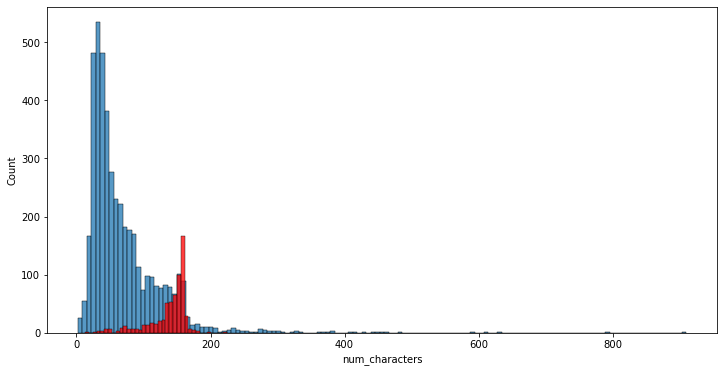

In [32]:
plt.figure(figsize=(12,6))
sns.histplot(df[df["label"] == 0]["num_characters"])
sns.histplot(df[df["label"] == 1]["num_characters"], color='red')

2. Number of words

<AxesSubplot:xlabel='num_words', ylabel='Count'>

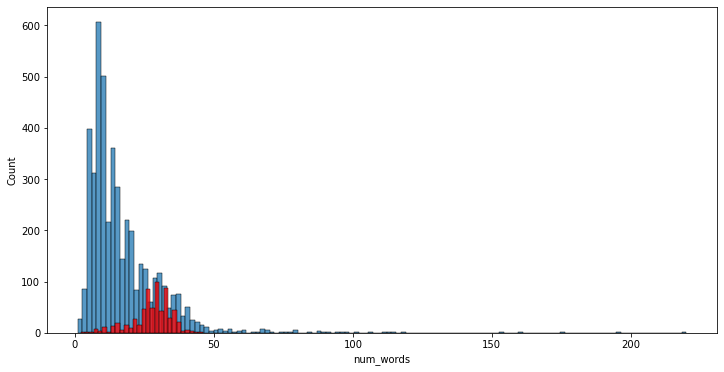

In [33]:
plt.figure(figsize=(12,6))
sns.histplot(df[df["label"] == 0]["num_words"])
sns.histplot(df[df["label"] == 1]["num_words"], color='red')

Mostly, spam messages are having more number of words 

but we can see, we have some outliers in ham messages here that have large number of words in text.

3. Number of sentences

<AxesSubplot:xlabel='num_sentences', ylabel='Count'>

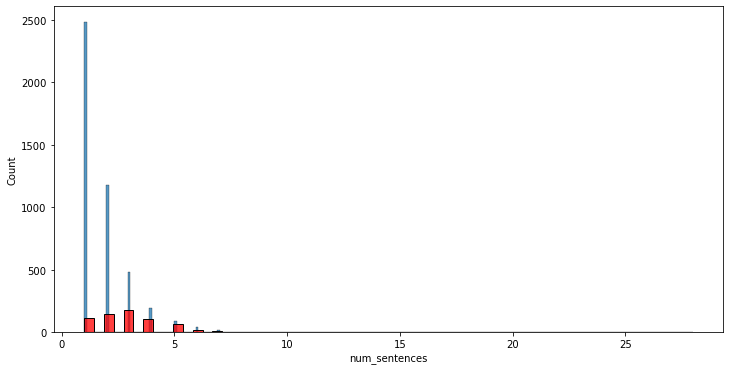

In [34]:
plt.figure(figsize=(12,6))
sns.histplot(df[df["label"] == 0]["num_sentences"])
sns.histplot(df[df["label"] == 1]["num_sentences"], color='red')

- Let us see relation between number of characters, words and sentences among themselves

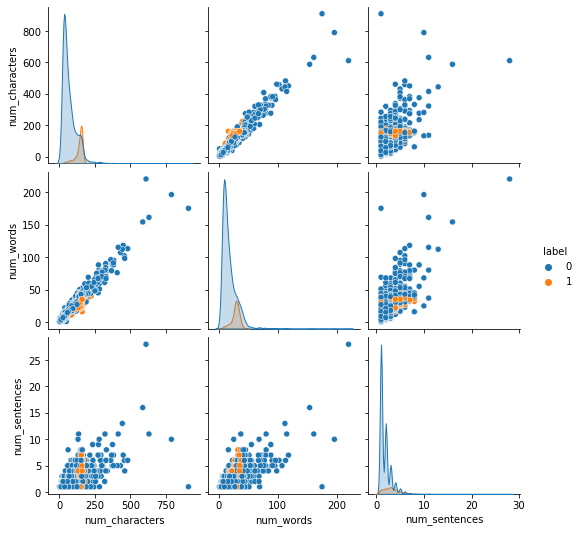

In [35]:
sns.pairplot(df, hue = 'label')

Mostly, as obvious relation between number of characters, words, sentences is linear only.

And we can observe here, we have lot of outliers in the dataset as well, which can affect our performance

We can see this linear relation thing using Pearson Correlation Coefficient as well:

The Pearson correlation coefficient, also known as Pearson's r or simply the correlation coefficient, is a statistic that quantifies the linear relationship between two continuous variables. It measures the strength and direction of the linear association between two variables. The coefficient can take values between -1 and 1, where:

1 indicates a perfect positive linear relationship, meaning that as one variable increases, the other also increases proportionally.
-1 indicates a perfect negative linear relationship, meaning that as one variable increases, the other decreases proportionally.
0 indicates no linear relationship between the variables.

In [36]:
df.corr()

,label,num_characters,num_words,num_sentences
label,1.000000,0.384717,0.262984,0.284901
num_characters,0.384717,1.000000,0.965770,0.638143
num_words,0.262984,0.965770,1.000000,0.684541
num_sentences,0.284901,0.638143,0.684541,1.000000


<AxesSubplot:>

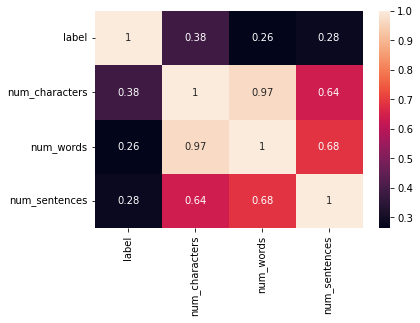

In [37]:
sns.heatmap(df.corr(), annot= True)

- Multicollinearity Problem

Now, the thing to observe here, is as these three columns have high correlation between themselves, this is a clear case of multicollinearity.

But in ML models, the input features should be independent of each other or it should be having as much less dependency as much possible to reduce unnecesaary bias of those feature in the model prediction.

So, here out of the columns num_characters, num_words and num_sentences, we can just keep one column for our model training purpose.

We can take num_characters which have the most correlation with the target variable. (0.38)

## 3. Data Proprocessing

In case of our problem, data is texual, so we can follow some text processing techniques:

Text processing, also known as natural language processing (NLP), is a field of artificial intelligence that focuses on the interaction between computers and human language. It involves the manipulation, analysis, and understanding of text data in various forms, such as written documents, social media posts, emails, and more. Text processing is essential for a wide range of applications, including text analysis, sentiment analysis, chatbots, language translation, information retrieval, and many others.

Here are some common tasks and techniques in text processing:

1. **Lower case**:

2. **Tokenization**:
     Breaking text into individual words or tokens. Tokenization is a fundamental step in many NLP tasks.
3. **Removing special characters**: Keeping only those characters which are either numeric or alpha-numeric.

4. **Removing stop words and punctuations**:
   Eliminating common words (stopwords) that don't carry much meaning, such as "the," "is," "and," etc.

5. **Stemming and Lemmatization**:
   
   Reducing words to their root forms. Stemming removes prefixes and suffixes, while lemmatization maps words to their dictionary form.
   
   Example: Dance, dancing, danced - All these words carry the same meaning dance.

Let us step wise create a single function to do all these text processing steps in one go:

### 1. Lower Case

In [38]:
def transform_text(text):
    text = text.lower()
    return text  

In [39]:
transform_text("Hi how Are you")

'hi how are you'

### 2. Tokenization

In [40]:
def transform_text(text):
    text = text.lower()
    word_list = nltk.word_tokenize(text)
    return word_list  

In [41]:
transform_text("Hi how Are you")

['hi', 'how', 'are', 'you']

### 3. Removing special characters

In [42]:
def transform_text(text):
    text = text.lower()
    word_list = nltk.word_tokenize(text)
    new_list = []
    for i in word_list:
        if i.isalnum():
            new_list.append(i)
    return new_list 

In [43]:
transform_text("Hi $$ how Are you? ##")

['hi', 'how', 'are', 'you']

### 4. Removing stop words and punctuations

Removing stop words is a common text processing step in natural language processing (NLP) to improve the quality of text analysis by eliminating words that don't carry significant meaning. Stop words are typically common words such as "the," "is," "and," "in," and "it." To remove stop words from text, you can follow these steps using Python and NLTK (Natural Language Toolkit), which provides a list of common stop words and tools for text processing:

In [44]:
from nltk.corpus import stopwords

Download the list of stopwords

In [45]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/rajatchauhan/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [46]:
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

To remove punctuation marks from text in Python, you can use the string library, which provides a constant called string.punctuation that contains a string of all common punctuation characters. Here's how you can remove punctuation marks from text:

In [47]:
import string

In [48]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [49]:
def transform_text(text):
    text = text.lower()
    word_list = nltk.word_tokenize(text)
    new_list = []
    for i in word_list:
        if i.isalnum():
            new_list.append(i)
    new_list2 = []
    
    for i in new_list:
        if i not in stopwords.words("english") and i not in string.punctuation:
            new_list2.append(i)
            
    return new_list2  

In [50]:
transform_text("Did you like my ML Presentation")

['like', 'ml', 'presentation']

### 4. Stemming

Reducing words to their root forms. Stemming removes prefixes and suffixes, while lemmatization maps words to their dictionary form.
   
   Example: Dance, dancing, danced - All these words carry the same meaning dance.

In [51]:
from nltk.stem import PorterStemmer

Download the Porter Stemmer data (if not already downloaded)

In [52]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/rajatchauhan/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [53]:
ps = PorterStemmer()

In [54]:
ps.stem("Dancing")

'danc'

In [55]:
ps.stem("Loving")

'love'

Let us add this stemming technique as well to our function:

In [56]:
def transform_text(text):
    text = text.lower()
    word_list = nltk.word_tokenize(text)
    new_list = []
    for i in word_list:
        if i.isalnum():
            new_list.append(i)
    new_list2 = []
    
    for i in new_list:
        if i not in stopwords.words("english") and i not in string.punctuation:
            new_list2.append(i)
            
    new_list3 = []
    
    for i in new_list2:
        i = ps.stem(i)
        new_list3.append(i)
            
    return " ".join(new_list3)

In [57]:
transform_text("I am loving this stemming technique")

'love stem techniqu'

In [58]:
df

,label,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1
...,...,...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,161,35,4
5568,0,Will Ì_ b going to esplanade fr home?,37,9,1
5569,0,"Pity, * was in mood for that. So...any other s...",57,15,2
5570,0,The guy did some bitching but I acted like i'd...,125,27,1


In [59]:
df["text"][10]

"I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today."

In [60]:
transform_text(df["text"][10])

'gon na home soon want talk stuff anymor tonight k cri enough today'

Let us apply all these transformations now to our dataframe text column

In [61]:
df['text'].apply(transform_text)

0       go jurong point crazi avail bugi n great world...
1                                   ok lar joke wif u oni
2       free entri 2 wkli comp win fa cup final tkt 21...
3                     u dun say earli hor u c alreadi say
4                    nah think goe usf live around though
                              ...                        
5567    2nd time tri 2 contact u pound prize 2 claim e...
5568                                b go esplanad fr home
5569                                    piti mood suggest
5570    guy bitch act like interest buy someth els nex...
5571                                       rofl true name
Name: text, Length: 5169, dtype: object

In [62]:
df["transformed_text"] = df['text'].apply(transform_text)
df.head()

,label,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


### Word cloud for Spam and Non Spam emails

A word cloud is a graphical representation of a collection of words where the size of each word represents its frequency or importance within the text. 

Typically, words that appear more frequently are displayed in a larger font size, while less common words are displayed in a smaller font size. 

This visual representation is often used to quickly and visually analyze the most prominent words or themes in a given piece of text, such as a document, article, or speech.

In [63]:
from wordcloud import WordCloud

In [64]:
wc = WordCloud(width = 500, height = 500, min_font_size = 10, background_color = 'white')

- Filtering spam emails transformed text part

In [65]:
df[df["label"] == 1]["transformed_text"]

2       free entri 2 wkli comp win fa cup final tkt 21...
5       freemsg hey darl 3 week word back like fun sti...
8       winner valu network custom select receivea pri...
9       mobil 11 month u r entitl updat latest colour ...
11      six chanc win cash 100 pound txt csh11 send co...
                              ...                        
5537    want explicit sex 30 sec ring 02073162414 cost...
5540    ask 3mobil 0870 chatlin inclu free min india c...
5547    contract mobil 11 mnth latest motorola nokia e...
5566    remind o2 get pound free call credit detail gr...
5567    2nd time tri 2 contact u pound prize 2 claim e...
Name: transformed_text, Length: 653, dtype: object

- Concatenating all the strings together

In [66]:
df[df["label"] == 1]["transformed_text"].str.cat(sep=" ")

'free entri 2 wkli comp win fa cup final tkt 21st may text fa 87121 receiv entri question std txt rate c appli 08452810075over18 freemsg hey darl 3 week word back like fun still tb ok xxx std chg send rcv winner valu network custom select receivea prize reward claim call claim code kl341 valid 12 hour mobil 11 month u r entitl updat latest colour mobil camera free call mobil updat co free 08002986030 six chanc win cash 100 pound txt csh11 send cost 6day tsandc appli repli hl 4 info urgent 1 week free membership prize jackpot txt word claim 81010 c lccltd pobox 4403ldnw1a7rw18 xxxmobilemovieclub use credit click wap link next txt messag click http england v macedonia dont miss news txt ur nation team 87077 eg england 87077 tri wale scotland poboxox36504w45wq thank subscript rington uk mobil charg pleas confirm repli ye repli charg 07732584351 rodger burn msg tri call repli sm free nokia mobil free camcord pleas call 08000930705 deliveri tomorrow sm ac sptv new jersey devil detroit red w

In [67]:
spam_wc = wc.generate(df[df["label"] == 1]["transformed_text"].str.cat(sep=" "))

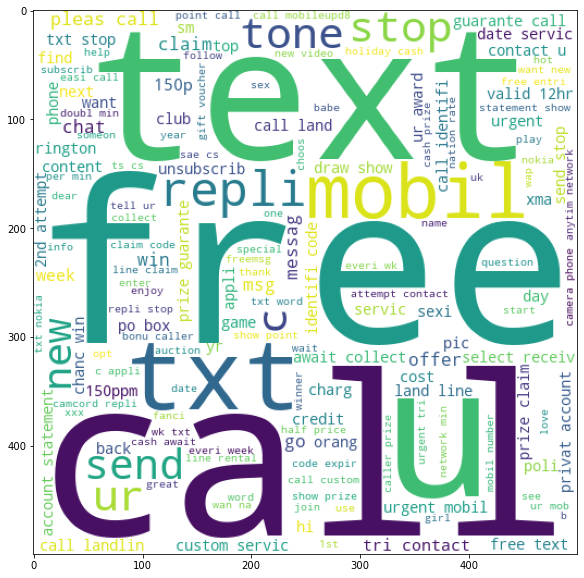

In [68]:
plt.figure(figsize = (20,10))
plt.imshow(spam_wc)

 - Same thing for ham messages

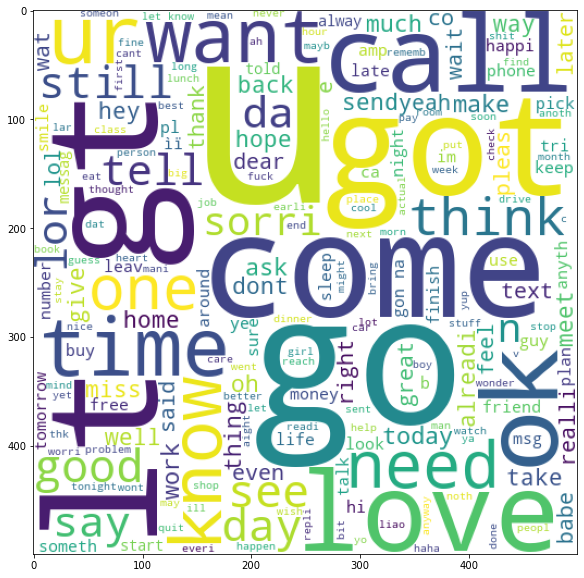

In [69]:
ham_wc = wc.generate(df[df["label"] == 0]["transformed_text"].str.cat(sep=" "))
plt.figure(figsize = (20,10))
plt.imshow(ham_wc)

### Finding top words used in Spam and Ham messages

Let us write some code to split the words and do this

- For top Spam words

In [70]:
df[df["label"] == 1]

,label,text,num_characters,num_words,num_sentences,transformed_text
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
5,1,FreeMsg Hey there darling it's been 3 week's n...,148,39,4,freemsg hey darl 3 week word back like fun sti...
8,1,WINNER!! As a valued network customer you have...,158,32,5,winner valu network custom select receivea pri...
9,1,Had your mobile 11 months or more? U R entitle...,154,31,3,mobil 11 month u r entitl updat latest colour ...
11,1,"SIX chances to win CASH! From 100 to 20,000 po...",136,31,3,six chanc win cash 100 pound txt csh11 send co...
...,...,...,...,...,...,...
5537,1,Want explicit SEX in 30 secs? Ring 02073162414...,90,18,3,want explicit sex 30 sec ring 02073162414 cost...
5540,1,ASKED 3MOBILE IF 0870 CHATLINES INCLU IN FREE ...,160,38,6,ask 3mobil 0870 chatlin inclu free min india c...
5547,1,Had your contract mobile 11 Mnths? Latest Moto...,160,35,5,contract mobil 11 mnth latest motorola nokia e...
5566,1,REMINDER FROM O2: To get 2.50 pounds free call...,147,30,1,remind o2 get pound free call credit detail gr...


In [71]:
df[df["label"] == 1]["transformed_text"]

2       free entri 2 wkli comp win fa cup final tkt 21...
5       freemsg hey darl 3 week word back like fun sti...
8       winner valu network custom select receivea pri...
9       mobil 11 month u r entitl updat latest colour ...
11      six chanc win cash 100 pound txt csh11 send co...
                              ...                        
5537    want explicit sex 30 sec ring 02073162414 cost...
5540    ask 3mobil 0870 chatlin inclu free min india c...
5547    contract mobil 11 mnth latest motorola nokia e...
5566    remind o2 get pound free call credit detail gr...
5567    2nd time tri 2 contact u pound prize 2 claim e...
Name: transformed_text, Length: 653, dtype: object

In [72]:
df[df["label"] == 1]["transformed_text"].str.cat(sep = " ")

'free entri 2 wkli comp win fa cup final tkt 21st may text fa 87121 receiv entri question std txt rate c appli 08452810075over18 freemsg hey darl 3 week word back like fun still tb ok xxx std chg send rcv winner valu network custom select receivea prize reward claim call claim code kl341 valid 12 hour mobil 11 month u r entitl updat latest colour mobil camera free call mobil updat co free 08002986030 six chanc win cash 100 pound txt csh11 send cost 6day tsandc appli repli hl 4 info urgent 1 week free membership prize jackpot txt word claim 81010 c lccltd pobox 4403ldnw1a7rw18 xxxmobilemovieclub use credit click wap link next txt messag click http england v macedonia dont miss news txt ur nation team 87077 eg england 87077 tri wale scotland poboxox36504w45wq thank subscript rington uk mobil charg pleas confirm repli ye repli charg 07732584351 rodger burn msg tri call repli sm free nokia mobil free camcord pleas call 08000930705 deliveri tomorrow sm ac sptv new jersey devil detroit red w

In [73]:
df[df["label"] == 1]["transformed_text"].str.cat(sep = " ").split(" ")

['free',
 'entri',
 '2',
 'wkli',
 'comp',
 'win',
 'fa',
 'cup',
 'final',
 'tkt',
 '21st',
 'may',
 'text',
 'fa',
 '87121',
 'receiv',
 'entri',
 'question',
 'std',
 'txt',
 'rate',
 'c',
 'appli',
 '08452810075over18',
 'freemsg',
 'hey',
 'darl',
 '3',
 'week',
 'word',
 'back',
 'like',
 'fun',
 'still',
 'tb',
 'ok',
 'xxx',
 'std',
 'chg',
 'send',
 'rcv',
 'winner',
 'valu',
 'network',
 'custom',
 'select',
 'receivea',
 'prize',
 'reward',
 'claim',
 'call',
 'claim',
 'code',
 'kl341',
 'valid',
 '12',
 'hour',
 'mobil',
 '11',
 'month',
 'u',
 'r',
 'entitl',
 'updat',
 'latest',
 'colour',
 'mobil',
 'camera',
 'free',
 'call',
 'mobil',
 'updat',
 'co',
 'free',
 '08002986030',
 'six',
 'chanc',
 'win',
 'cash',
 '100',
 'pound',
 'txt',
 'csh11',
 'send',
 'cost',
 '6day',
 'tsandc',
 'appli',
 'repli',
 'hl',
 '4',
 'info',
 'urgent',
 '1',
 'week',
 'free',
 'membership',
 'prize',
 'jackpot',
 'txt',
 'word',
 'claim',
 '81010',
 'c',
 'lccltd',
 'pobox',
 '4403ldnw

In [74]:
spam_corpus = df[df["label"] == 1]["transformed_text"].str.cat(sep = " ").split(" ")
spam_corpus

['free',
 'entri',
 '2',
 'wkli',
 'comp',
 'win',
 'fa',
 'cup',
 'final',
 'tkt',
 '21st',
 'may',
 'text',
 'fa',
 '87121',
 'receiv',
 'entri',
 'question',
 'std',
 'txt',
 'rate',
 'c',
 'appli',
 '08452810075over18',
 'freemsg',
 'hey',
 'darl',
 '3',
 'week',
 'word',
 'back',
 'like',
 'fun',
 'still',
 'tb',
 'ok',
 'xxx',
 'std',
 'chg',
 'send',
 'rcv',
 'winner',
 'valu',
 'network',
 'custom',
 'select',
 'receivea',
 'prize',
 'reward',
 'claim',
 'call',
 'claim',
 'code',
 'kl341',
 'valid',
 '12',
 'hour',
 'mobil',
 '11',
 'month',
 'u',
 'r',
 'entitl',
 'updat',
 'latest',
 'colour',
 'mobil',
 'camera',
 'free',
 'call',
 'mobil',
 'updat',
 'co',
 'free',
 '08002986030',
 'six',
 'chanc',
 'win',
 'cash',
 '100',
 'pound',
 'txt',
 'csh11',
 'send',
 'cost',
 '6day',
 'tsandc',
 'appli',
 'repli',
 'hl',
 '4',
 'info',
 'urgent',
 '1',
 'week',
 'free',
 'membership',
 'prize',
 'jackpot',
 'txt',
 'word',
 'claim',
 '81010',
 'c',
 'lccltd',
 'pobox',
 '4403ldnw

In [75]:
len(spam_corpus)

9939

- Using Counter method of Collections

In [76]:
from collections import Counter

In [77]:
Counter(spam_corpus)

Counter({'free': 191,
         'entri': 21,
         '2': 155,
         'wkli': 9,
         'comp': 8,
         'win': 48,
         'fa': 2,
         'cup': 3,
         'final': 14,
         'tkt': 2,
         '21st': 1,
         'may': 6,
         'text': 122,
         '87121': 2,
         'receiv': 31,
         'question': 9,
         'std': 6,
         'txt': 141,
         'rate': 26,
         'c': 45,
         'appli': 24,
         '08452810075over18': 1,
         'freemsg': 14,
         'hey': 5,
         'darl': 2,
         '3': 20,
         'week': 49,
         'word': 21,
         'back': 20,
         'like': 12,
         'fun': 8,
         'still': 5,
         'tb': 1,
         'ok': 5,
         'xxx': 10,
         'chg': 2,
         'send': 60,
         'rcv': 2,
         'winner': 13,
         'valu': 8,
         'network': 26,
         'custom': 42,
         'select': 26,
         'receivea': 1,
         'prize': 82,
         'reward': 9,
         'claim': 98,
         'cal

This is a dictionary with values denoting the frequency of that word.

Let us the most common 30

In [78]:
Counter(spam_corpus).most_common(30)

[('call', 320),
 ('free', 191),
 ('2', 155),
 ('txt', 141),
 ('text', 122),
 ('u', 119),
 ('ur', 119),
 ('mobil', 114),
 ('stop', 104),
 ('repli', 103),
 ('claim', 98),
 ('4', 97),
 ('prize', 82),
 ('get', 74),
 ('new', 64),
 ('servic', 64),
 ('tone', 63),
 ('send', 60),
 ('urgent', 57),
 ('nokia', 57),
 ('contact', 56),
 ('award', 55),
 ('phone', 52),
 ('cash', 51),
 ('pleas', 51),
 ('week', 49),
 ('win', 48),
 ('c', 45),
 ('collect', 45),
 ('min', 45)]

In [79]:
pd.DataFrame(Counter(spam_corpus).most_common(30))

,0,1
0,call,320
1,free,191
2,2,155
3,txt,141
4,text,122
5,u,119
6,ur,119
7,mobil,114
8,stop,104
9,repli,103


/Users/rajatchauhan/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


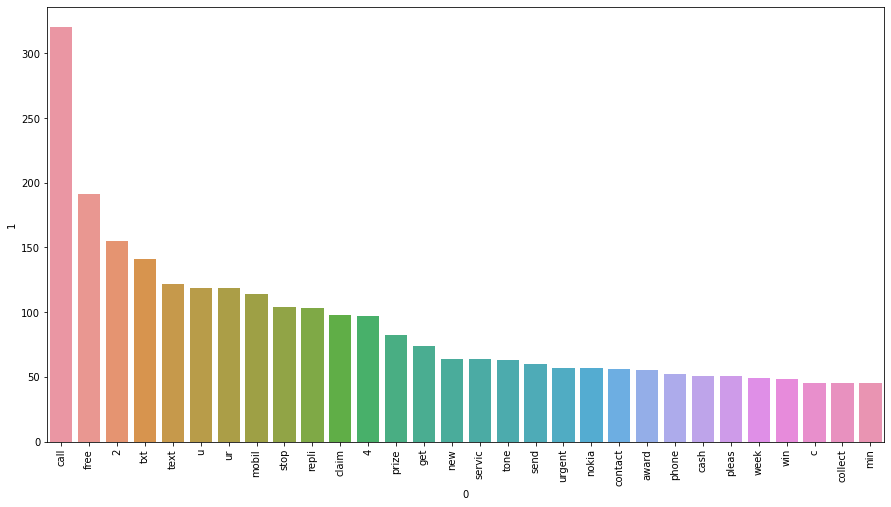

In [80]:
plt.figure(figsize= (15,8))
sns.barplot(pd.DataFrame(Counter(spam_corpus).most_common(30))[0],
            pd.DataFrame(Counter(spam_corpus).most_common(30))[1])

plt.xticks(rotation = "vertical")
plt.show()

All this is done, to increase the interpretability of the model flow. So that we can show this is what is causing the issues

- Same thing getting top 30 ham words

/Users/rajatchauhan/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


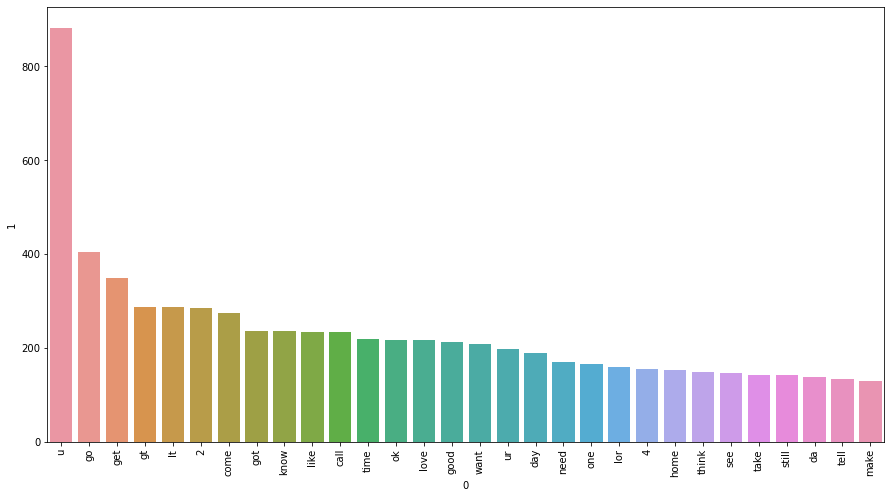

In [81]:
ham_corpus = df[df["label"] == 0]["transformed_text"].str.cat(sep = " ").split(" ")
plt.figure(figsize= (15,8))
sns.barplot(pd.DataFrame(Counter(ham_corpus).most_common(30))[0],
            pd.DataFrame(Counter(ham_corpus).most_common(30))[1])

plt.xticks(rotation = "vertical")
plt.show()

# 4. Model Building

## 1. Vectorization of textual data

The Naive Bayes algorithm, in its basic form, cannot directly work on raw textual data. Instead, you need to convert the textual data into a numerical or vectorized form before applying Naive Bayes.

The "Bag of Words" (BoW) is a common and fundamental technique used in natural language processing and text analysis to represent text data as numerical features that machine learning algorithms can work with. The BoW model is a simple and effective way to convert textual data into a numeric format for text analysis and classification tasks. Here's how it works:

1. **Tokenization**: The first step in creating a Bag of Words model is to tokenize the text. Tokenization breaks down a text into individual words or terms. Each word or term is considered a "token."

2. **Vocabulary Creation**: Once the text is tokenized, a vocabulary is constructed. The vocabulary is essentially a list of all unique words or terms that appear in the corpus (collection of documents or texts). Each word in the vocabulary is assigned a unique index.

3. **Word Counting**: For each document in the corpus, the BoW model counts how many times each word from the vocabulary appears in that document. These counts are often referred to as "term frequencies."

4. **Feature Vector**: The result is a numeric feature vector for each document. Each element of the vector corresponds to the count of a specific word from the vocabulary in that document. The order of the words in the vector doesn't matter; it's just a "bag" of word counts.

5. **Sparse Representation**: In practice, BoW vectors tend to be very sparse, meaning that most elements of the vector are zeros because most documents don't contain every word from the vocabulary. Sparse representations are space-efficient.

Here's an example:

Let's say you have two documents:

- Document 1: "The quick brown fox"
- Document 2: "The lazy dog"

The vocabulary contains unique words from both documents:

- Vocabulary: ["The", "quick", "brown", "fox", "lazy", "dog"]

The BoW vectors for the documents would be:

- Document 1: [1, 1, 1, 1, 0, 0] (because it contains "The," "quick," "brown," and "fox" once each)
- Document 2: [1, 0, 0, 0, 1, 1] (because it contains "The," "lazy," and "dog" once each)

These BoW vectors are now in numeric format and can be used as input data for machine learning algorithms. The BoW model does not capture word order or semantics; it merely counts the occurrence of words in a document. Despite its simplicity, BoW is widely used for tasks like text classification, sentiment analysis, and information retrieval.

## Using CountVectorizer

"CountVectorizer," which is a specific feature extraction technique commonly used in natural language processing (NLP) and text analysis. CountVectorizer is often used to create a Bag of Words representation of text data, where it counts the frequency of each word in a document or a collection of documents.

CountVectorizer is typically available as a function or a class in NLP libraries like Scikit-Learn (a popular Python library for machine learning and data science). Here's how it works:

In [82]:
from sklearn.feature_extraction.text import CountVectorizer

In [83]:
cv = CountVectorizer()

In [84]:
X = cv.fit_transform(df["transformed_text"]).toarray()
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [85]:
X.shape

(5169, 6708)

In [86]:
df

,label,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though
...,...,...,...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,161,35,4,2nd time tri 2 contact u pound prize 2 claim e...
5568,0,Will Ì_ b going to esplanade fr home?,37,9,1,b go esplanad fr home
5569,0,"Pity, * was in mood for that. So...any other s...",57,15,2,piti mood suggest
5570,0,The guy did some bitching but I acted like i'd...,125,27,1,guy bitch act like interest buy someth els nex...


So, we have converted all 5169 messages into vectorize form of 6708 words in each vector

In [87]:
y = df["label"].values

In [88]:
y

array([0, 0, 1, ..., 0, 0, 0])

In [89]:
y.shape

(5169,)

## 2. Train Test Split

In [90]:
from sklearn.model_selection import train_test_split

In [91]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2,random_state=2)

## 3. Using Naive Bayes Algorithm

The choice of which Naive Bayes algorithm to use in your model depends on the nature of your data and the specific problem you are trying to solve. There are three commonly used variants of Naive Bayes algorithms: Multinomial Naive Bayes, Bernoulli Naive Bayes, and Gaussian Naive Bayes. Here's a brief overview of each and when to use them:

1. **Multinomial Naive Bayes**:

   - **Use Case**: Multinomial Naive Bayes is well-suited for text classification problems, where the features (i.e., words or terms) are discrete and represent word frequencies or counts. It's commonly used for tasks such as spam detection, sentiment analysis, and document categorization.

   - **Data Type**: Multinomial Naive Bayes is appropriate for data with discrete features, particularly when dealing with text data represented as Bag of Words or TF-IDF features.

   - **Assumption**: Assumes that features are generated from a multinomial distribution (hence the name), making it suitable for count-based data.

2. **Bernoulli Naive Bayes**:

   - **Use Case**: Bernoulli Naive Bayes is suitable for binary data or problems where you have binary features, such as presence or absence of certain attributes. It's commonly used in text classification problems when you are interested in whether a word is present or not in a document.

   - **Data Type**: Bernoulli Naive Bayes works well when dealing with binary data, such as document presence/absence of specific terms or binary features.

   - **Assumption**: Assumes that features are generated from a Bernoulli distribution, where each feature is treated as a binary event.

3. **Gaussian Naive Bayes**:

   - **Use Case**: Gaussian Naive Bayes is suitable for problems where the features are continuous and follow a Gaussian (normal) distribution. It's commonly used in applications that involve real-valued data, such as medical diagnosis or feature engineering for machine learning models.

   - **Data Type**: Gaussian Naive Bayes works with continuous data, assuming that features are normally distributed.

   - **Assumption**: Assumes that features follow a Gaussian distribution, making it appropriate for real-valued data.

When choosing a Naive Bayes algorithm, consider the following factors:

- **Data Type**: Determine whether your data features are discrete (Multinomial or Bernoulli) or continuous (Gaussian).

- **Problem Type**: Consider the specific problem you are solving. For text classification and similar NLP tasks, Multinomial or Bernoulli Naive Bayes may be appropriate. For other types of data, Gaussian Naive Bayes might be more suitable.

- **Assumptions**: Be aware of the underlying distribution assumptions of each Naive Bayes variant and ensure that they align with your data. For instance, Multinomial and Bernoulli Naive Bayes assume different distributions.

- **Experimentation**: It's often a good practice to experiment with different variants and assess their performance using cross-validation or other evaluation metrics. The choice of algorithm can sometimes depend on empirical performance.

Ultimately, the choice of the Naive Bayes algorithm should be guided by your data characteristics and the specific requirements of your machine learning task.

In [92]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB

In [93]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score

1. Gaussian NB

In [94]:
gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_pred_gnb = gnb.predict(X_test)
y_pred_gnb

array([0, 1, 1, ..., 0, 0, 0])

In [95]:
print(accuracy_score(y_test, y_pred_gnb))
print(confusion_matrix(y_test, y_pred_gnb))
print(precision_score(y_test, y_pred_gnb))

0.8800773694390716
[[792 104]
 [ 20 118]]
0.5315315315315315


Clearly the input data that we have is already very biased, so a high accuracy number do not make any sense here, if the algorithm will predict all emails as ham, then also it will be having high accuracy.

We need to more focus on increasing precision:

In [96]:
confusion_matrix(y_test, y_pred_gnb)

array([[792, 104],
       [ 20, 118]])

In [97]:
X_test.shape

(1034, 6708)

In [98]:
pd.DataFrame(y_test).value_counts()

0    896
1    138
dtype: int64

The model is giving very low precision score: 
Precision is the ratio of true positive predictions to the total number of positive predictions (true positives plus false positives). 

There are total 138 spam emails and the algorithm is predicting 118 spams but actually doing so many False negatives which is 104, means labelling non spam emails as spam 104 times which is pathetic performance

In [99]:
118/(118+104)

0.5315315315315315

2. Multinomial NB

In [100]:
mnb = MultinomialNB()
mnb.fit(X_train, y_train)
y_pred_mnb = mnb.predict(X_test)
y_pred_mnb

array([0, 0, 0, ..., 0, 0, 0])

In [101]:
print(accuracy_score(y_test, y_pred_mnb))
print(confusion_matrix(y_test, y_pred_mnb))
print(precision_score(y_test, y_pred_mnb))

0.9642166344294004
[[871  25]
 [ 12 126]]
0.8344370860927153


Wow, the precision and accuracy everything is comparatively a better score,

but we need precision to be more than 90%

3. Bernoulli NB

In [102]:
bnb = BernoulliNB()
bnb.fit(X_train, y_train)
y_pred_bnb = bnb.predict(X_test)
print(accuracy_score(y_test, y_pred_bnb))
print(confusion_matrix(y_test, y_pred_bnb))
print(precision_score(y_test, y_pred_bnb))

0.9700193423597679
[[893   3]
 [ 28 110]]
0.9734513274336283


## Using TfidfVectorizer

Vectorization techniques like TF-IDF (Term Frequency-Inverse Document Frequency) and word embeddings (e.g., Word2Vec, GloVe) are commonly used to convert text data into numeric or vectorized form. These techniques capture the essence of the text data in a format suitable for machine learning algorithms. By converting text into numerical features, you can effectively use Naive Bayes and other machine learning models for tasks such as text classification, sentiment analysis, and document retrieval.

In [103]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [104]:
tfidf = TfidfVectorizer()

In [105]:
X = tfidf.fit_transform(df["transformed_text"]).toarray()

In [106]:
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [107]:
X.shape

(5169, 6708)

Shape is the same as done by Countvectorizer.

In [108]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2,random_state=2)

1. Gaussian NB

In [109]:
gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_pred_gnb = gnb.predict(X_test)
print(accuracy_score(y_test, y_pred_gnb))
print(confusion_matrix(y_test, y_pred_gnb))
print(precision_score(y_test, y_pred_gnb))

0.8762088974854932
[[793 103]
 [ 25 113]]
0.5231481481481481


2. Multinomial NB

In [110]:
mnb = MultinomialNB()
mnb.fit(X_train, y_train)
y_pred_mnb = mnb.predict(X_test)
print(accuracy_score(y_test, y_pred_mnb))
print(confusion_matrix(y_test, y_pred_mnb))
print(precision_score(y_test, y_pred_mnb))

0.9593810444874274
[[896   0]
 [ 42  96]]
1.0


Wow, this algorithm have got 100% precision, that's amazing

3. Bernoulli NB

In [111]:
bnb = BernoulliNB()
bnb.fit(X_train, y_train)
y_pred_bnb = bnb.predict(X_test)
print(accuracy_score(y_test, y_pred_bnb))
print(confusion_matrix(y_test, y_pred_bnb))
print(precision_score(y_test, y_pred_bnb))

0.9700193423597679
[[893   3]
 [ 28 110]]
0.9734513274336283


This is also, good but by using Tfidf vectorization, the numbers seems to get improved

-> Till now, we can go with tfidf vectorization on Multinomial NB which gives the best precision score.

## Trying all other algorithms and comparing

In [112]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier 

In [113]:
svc = SVC(kernel = "sigmoid", gamma = 1.0)
knc = KNeighborsClassifier(n_neighbors=5)
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrg = LogisticRegression(solver= "liblinear", penalty = "l1")
rfc = RandomForestClassifier(n_estimators = 50, random_state = 2)
abc = AdaBoostClassifier(n_estimators = 50, random_state = 2)
bc = BaggingClassifier(n_estimators = 50, random_state = 2)
etc = ExtraTreesClassifier(n_estimators = 50, random_state = 2)
gdbc = GradientBoostingClassifier(n_estimators = 50, random_state = 2)
xgbt = XGBClassifier(n_estimators = 50, random_state = 2 )

- Making a dictionary of all classifiers:

In [114]:
clfs = {
    "svc": svc,
    "knc": knc,
    "mnb": mnb,
    "dtc": dtc,
    "lrg": lrg,
    "rfc": rfc,
    "abc": abc,
    "bc": bc,
    "etc" : etc,
    "gdbc" : gdbc,
    "xgbt" : xgbt
}

- Making a function to train these algorithms:

In [115]:
def train_classifier(clf, X_train, y_train, X_test, y_test):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    
    return accuracy, precision

- Storing accuracy and precision in a list for all the algorithms to compare in a dataframe:

In [116]:
accuracy_scores = []
precision_scores = []

for name, clf in clfs.items():
    print(clf)
    

SVC(gamma=1.0, kernel='sigmoid')
KNeighborsClassifier()
MultinomialNB()
DecisionTreeClassifier(max_depth=5)
LogisticRegression(penalty='l1', solver='liblinear')
RandomForestClassifier(n_estimators=50, random_state=2)
AdaBoostClassifier(random_state=2)
BaggingClassifier(n_estimators=50, random_state=2)
ExtraTreesClassifier(n_estimators=50, random_state=2)
GradientBoostingClassifier(n_estimators=50, random_state=2)
XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=

In [117]:
accuracy_scores = []
precision_scores = []

for name, clf in clfs.items():
    ac, pr = train_classifier(clf, X_train, y_train, X_test, y_test)
    accuracy_scores.append(ac)
    precision_scores.append(pr)   

We have the performance scores now, let us create a performance dataframe:

In [118]:
performance_df1 = pd.DataFrame({"Algorithm" : clfs.keys(), 
                               "Accuracy" : accuracy_scores, 
                               "Precision" : precision_scores})
performance_df1

,Algorithm,Accuracy,Precision
0,svc,0.972921,0.974138
1,knc,0.900387,1.000000
2,mnb,0.959381,1.000000
3,dtc,0.936170,0.846154
4,lrg,0.951644,0.940000
5,rfc,0.973888,1.000000
6,abc,0.961315,0.945455
7,bc,0.958414,0.862595
8,etc,0.975822,0.982906
9,gdbc,0.952611,0.923810


In [119]:
performance_df1.sort_values("Precision", ascending= False)

,Algorithm,Accuracy,Precision
1,knc,0.900387,1.000000
2,mnb,0.959381,1.000000
5,rfc,0.973888,1.000000
8,etc,0.975822,0.982906
0,svc,0.972921,0.974138
6,abc,0.961315,0.945455
4,lrg,0.951644,0.940000
10,xgbt,0.972921,0.936508
9,gdbc,0.952611,0.923810
7,bc,0.958414,0.862595


-> From this table, Random Forest Classifier seems to be a good option

# Model Improvements Trials

### 1. Change the max_features parameter of TFidf vectorizer

In natural language processing (NLP), the max_features parameter is a common option in the TF-IDF (Term Frequency-Inverse Document Frequency) vectorization process. It determines the maximum number of features (words or terms) that will be used in the TF-IDF vectorization. The max_features parameter helps limit the vocabulary size by selecting only the most frequent terms, which can be useful for reducing dimensionality and memory usage in text analysis tasks.

We will perform the whole procedure again and compare the results

In [120]:
tfidf = TfidfVectorizer(max_features=3000)
X = tfidf.fit_transform(df["transformed_text"]).toarray()

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2,random_state=2)


accuracy_scores = []
precision_scores = []

for name, clf in clfs.items():
    ac, pr = train_classifier(clf, X_train, y_train, X_test, y_test)
    accuracy_scores.append(ac)
    precision_scores.append(pr)   

In [121]:
performance_df2 = pd.DataFrame({"Algorithm" : clfs.keys(), 
                               "Accuracy2_max_features3000" : accuracy_scores, 
                               "Precision2_max_features3000" : precision_scores})
performance_df2

,Algorithm,Accuracy2_max_features3000,Precision2_max_features3000
0,svc,0.975822,0.974790
1,knc,0.905222,1.000000
2,mnb,0.970986,1.000000
3,dtc,0.931335,0.825243
4,lrg,0.958414,0.970297
5,rfc,0.974855,0.982759
6,abc,0.960348,0.929204
7,bc,0.957447,0.867188
8,etc,0.974855,0.974576
9,gdbc,0.947776,0.920000


In [122]:
temp_df = performance_df1.merge(performance_df2, on = "Algorithm")
temp_df

,Algorithm,Accuracy,Precision,Accuracy2_max_features3000,Precision2_max_features3000
0,svc,0.972921,0.974138,0.975822,0.974790
1,knc,0.900387,1.000000,0.905222,1.000000
2,mnb,0.959381,1.000000,0.970986,1.000000
3,dtc,0.936170,0.846154,0.931335,0.825243
4,lrg,0.951644,0.940000,0.958414,0.970297
5,rfc,0.973888,1.000000,0.974855,0.982759
6,abc,0.961315,0.945455,0.960348,0.929204
7,bc,0.958414,0.862595,0.957447,0.867188
8,etc,0.975822,0.982906,0.974855,0.974576
9,gdbc,0.952611,0.923810,0.947776,0.920000


Now, we can notice the Accuracy of Multinomial Naive Bayes have increased from 94 to 97% after setting max_features = 3000

## 2. Let us do scaling of the features to see if we can improve something

We cannot use standard scaler as it can give negative values but Naive bayes not work for negative quantities.

We will use min max scaler

In [123]:
tfidf = TfidfVectorizer(max_features=3000)
X = tfidf.fit_transform(df["transformed_text"]).toarray()

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2,random_state=2)


accuracy_scores = []
precision_scores = []

for name, clf in clfs.items():
    ac, pr = train_classifier(clf, X_train, y_train, X_test, y_test)
    accuracy_scores.append(ac)
    precision_scores.append(pr)   

In [124]:
performance_df3 = pd.DataFrame({"Algorithm" : clfs.keys(), 
                               "Accuracy_scaling" : accuracy_scores, 
                               "Precision_scaling" : precision_scores})
performance_df3

,Algorithm,Accuracy_scaling,Precision_scaling
0,svc,0.966151,0.925620
1,knc,0.905222,0.976190
2,mnb,0.978723,0.946154
3,dtc,0.929400,0.828283
4,lrg,0.967118,0.964286
5,rfc,0.974855,0.982759
6,abc,0.960348,0.929204
7,bc,0.957447,0.867188
8,etc,0.974855,0.974576
9,gdbc,0.947776,0.920000


In [125]:
temp_df = temp_df.merge(performance_df3, on = "Algorithm")
temp_df

,Algorithm,Accuracy,Precision,Accuracy2_max_features3000,Precision2_max_features3000,Accuracy_scaling,Precision_scaling
0,svc,0.972921,0.974138,0.975822,0.974790,0.966151,0.925620
1,knc,0.900387,1.000000,0.905222,1.000000,0.905222,0.976190
2,mnb,0.959381,1.000000,0.970986,1.000000,0.978723,0.946154
3,dtc,0.936170,0.846154,0.931335,0.825243,0.929400,0.828283
4,lrg,0.951644,0.940000,0.958414,0.970297,0.967118,0.964286
5,rfc,0.973888,1.000000,0.974855,0.982759,0.974855,0.982759
6,abc,0.961315,0.945455,0.960348,0.929204,0.960348,0.929204
7,bc,0.958414,0.862595,0.957447,0.867188,0.957447,0.867188
8,etc,0.975822,0.982906,0.974855,0.974576,0.974855,0.974576
9,gdbc,0.952611,0.923810,0.947776,0.920000,0.947776,0.920000


Accuracy have increased but its of no use for us as precision after scaling have reduced.

So, we will remove this scaling step from our algorithm.

## 3. Taking Number of characters also as an input feature 

In [126]:
df

,label,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though
...,...,...,...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,161,35,4,2nd time tri 2 contact u pound prize 2 claim e...
5568,0,Will Ì_ b going to esplanade fr home?,37,9,1,b go esplanad fr home
5569,0,"Pity, * was in mood for that. So...any other s...",57,15,2,piti mood suggest
5570,0,The guy did some bitching but I acted like i'd...,125,27,1,guy bitch act like interest buy someth els nex...


In [127]:
tfidf = TfidfVectorizer(max_features=3000)
X = tfidf.fit_transform(df["transformed_text"]).toarray()
X.shape

(5169, 3000)

In [128]:
X = np.hstack((X,df["num_characters"].values.reshape(-1,1)))
X.shape

(5169, 3001)

In [129]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2,random_state=2)


accuracy_scores = []
precision_scores = []

for name, clf in clfs.items():
    ac, pr = train_classifier(clf, X_train, y_train, X_test, y_test)
    accuracy_scores.append(ac)
    precision_scores.append(pr)  

/Users/rajatchauhan/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [130]:
performance_df4 = pd.DataFrame({"Algorithm" : clfs.keys(), 
                               "Accuracy_num_char" : accuracy_scores, 
                               "Precision_num_char" : precision_scores})

In [131]:
temp_df = temp_df.merge(performance_df4, on = "Algorithm")
temp_df

,Algorithm,Accuracy,Precision,Accuracy2_max_features3000,Precision2_max_features3000,Accuracy_scaling,Precision_scaling,Accuracy_num_char,Precision_num_char
0,svc,0.972921,0.974138,0.975822,0.974790,0.966151,0.925620,0.866538,0.000000
1,knc,0.900387,1.000000,0.905222,1.000000,0.905222,0.976190,0.927466,0.773913
2,mnb,0.959381,1.000000,0.970986,1.000000,0.978723,0.946154,0.941006,1.000000
3,dtc,0.936170,0.846154,0.931335,0.825243,0.929400,0.828283,0.944874,0.885714
4,lrg,0.951644,0.940000,0.958414,0.970297,0.967118,0.964286,0.961315,0.962264
5,rfc,0.973888,1.000000,0.974855,0.982759,0.974855,0.982759,0.968085,0.981651
6,abc,0.961315,0.945455,0.960348,0.929204,0.960348,0.929204,0.964217,0.931624
7,bc,0.958414,0.862595,0.957447,0.867188,0.957447,0.867188,0.966151,0.899225
8,etc,0.975822,0.982906,0.974855,0.974576,0.974855,0.974576,0.980658,0.975806
9,gdbc,0.952611,0.923810,0.947776,0.920000,0.947776,0.920000,0.951644,0.931373


So, here also we are not getting improvements, the accuracy got down for mnb.

## 4. Using Voting Classifier on top of Best Performing Algorithms

Voting classifier have chances of even outperforming the best performing algorithm.

In [132]:
mnb = MultinomialNB()
knc = KNeighborsClassifier(n_neighbors=5)
rfc = RandomForestClassifier(n_estimators=30, random_state=2)

In [133]:
from sklearn.ensemble import VotingClassifier

In [134]:
voting = VotingClassifier(estimators=[("mnb", mnb), ("knc", knc), ("rfc", rfc)], voting = "soft")

In [135]:
tfidf = TfidfVectorizer(max_features=3000)
X = tfidf.fit_transform(df["transformed_text"]).toarray()
X.shape

(5169, 3000)

In [136]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2,random_state=2)

In [137]:
voting.fit(X_train, y_train)

VotingClassifier(estimators=[('mnb', MultinomialNB()),
                             ('knc', KNeighborsClassifier()),
                             ('rfc',
                              RandomForestClassifier(n_estimators=30,
                                                     random_state=2))],
                 voting='soft')

In [138]:
y_pred = voting.predict(X_test)
print("Accuracy score", accuracy_score(y_test, y_pred))
print("Precision score", precision_score(y_test, y_pred))

Accuracy score 0.9545454545454546
Precision score 1.0


Still, accuracy got down, so not as such of any use

## 5. Using Stacking

In stacking we simply add one more layer by using the outputs of the estimators to train a final estimator

In [139]:
from sklearn.ensemble import StackingClassifier

In [140]:
estimators=[("mnb", mnb), ("knc", knc), ("rfc", rfc)]
final_estimator = RandomForestClassifier()

In [141]:
stc = StackingClassifier(estimators= estimators, final_estimator=final_estimator)

In [142]:
stc.fit(X_train, y_train)
y_pred = stc.predict(X_test)
print("Accuracy score", accuracy_score(y_test, y_pred))
print("Precision score", precision_score(y_test, y_pred))

Accuracy score 0.9700193423597679
Precision score 0.8905109489051095


Still, no as such advantage of using Stacking as well. 

## Conclusion

We will simply go with Multinomial Naive Bayes with using TfidfVectorizer, which gives the best precision and best accuracy combination

In [143]:
tfidf = TfidfVectorizer(max_features=3000)

In [144]:
X = tfidf.fit_transform(df["transformed_text"]).toarray()
X.shape

(5169, 3000)

In [145]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2,random_state=2)

In [146]:
mnb = MultinomialNB()
mnb.fit(X_train, y_train)
y_pred_mnb = mnb.predict(X_test)
print(accuracy_score(y_test, y_pred_mnb))
print(confusion_matrix(y_test, y_pred_mnb))
print(precision_score(y_test, y_pred_mnb))

0.9709864603481625
[[896   0]
 [ 30 108]]
1.0


# Creating whole pipeline for this project

We would just be using one function to do the transformation of text so we do not require any pipelines here.

Let us dump the objects that we have finalized

In [147]:
import pickle

In [148]:
pickle.dump(tfidf, open("vectorizer.pkl", "wb"))
pickle.dump(mnb, open("model.pkl", "wb"))

We can also dump the preprocessing function so that it can be used at the prediction stage

In [149]:
from nltk.corpus import stopwords
import string
from nltk.stem.porter import PorterStemmer
import nltk

ps = PorterStemmer()
nltk.download('stopwords')

def transform_text(text):
    text = text.lower()
    word_list = nltk.word_tokenize(text)
    new_list = []
    for i in word_list:
        if i.isalnum():
            new_list.append(i)
    new_list2 = []
    
    for i in new_list:
        if i not in stopwords.words("english") and i not in string.punctuation:
            new_list2.append(i)
            
    new_list3 = []
    
    for i in new_list2:
        i = ps.stem(i)
        new_list3.append(i)
            
    return " ".join(new_list3)


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/rajatchauhan/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [150]:
pickle.dump(transform_text, open("transform.pkl", "wb"))

In [151]:
transform_text("Hi *** lnscnldncs hih i am loving")

'hi lnscnldnc hih love'